# Pokemon Analysis

Data: https://www.kaggle.com/abcsds/pokemon

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
%config InlineBackend.figure_format='retina'

from sklearn.decomposition import PCA

### Data Cleaning and Wrangling

In [36]:
# read in Pokemon dataset
pokemon = pd.read_csv('./../data/Pokemon.csv')
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
# print dataset shape
pokemon.shape

(800, 13)

In [4]:
# print dataset missingness
pokemon.isna().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

**Missingness Analysis** 

"Type 2" is the only column with missingness in this dataset. Pokemon with only one type will have a null value for their second type, meaning this column is not missing at random. Missingness for "Type 2" is related to "Type 2" itself, and is not a function of other columns.

### Exploratory Data Analysis

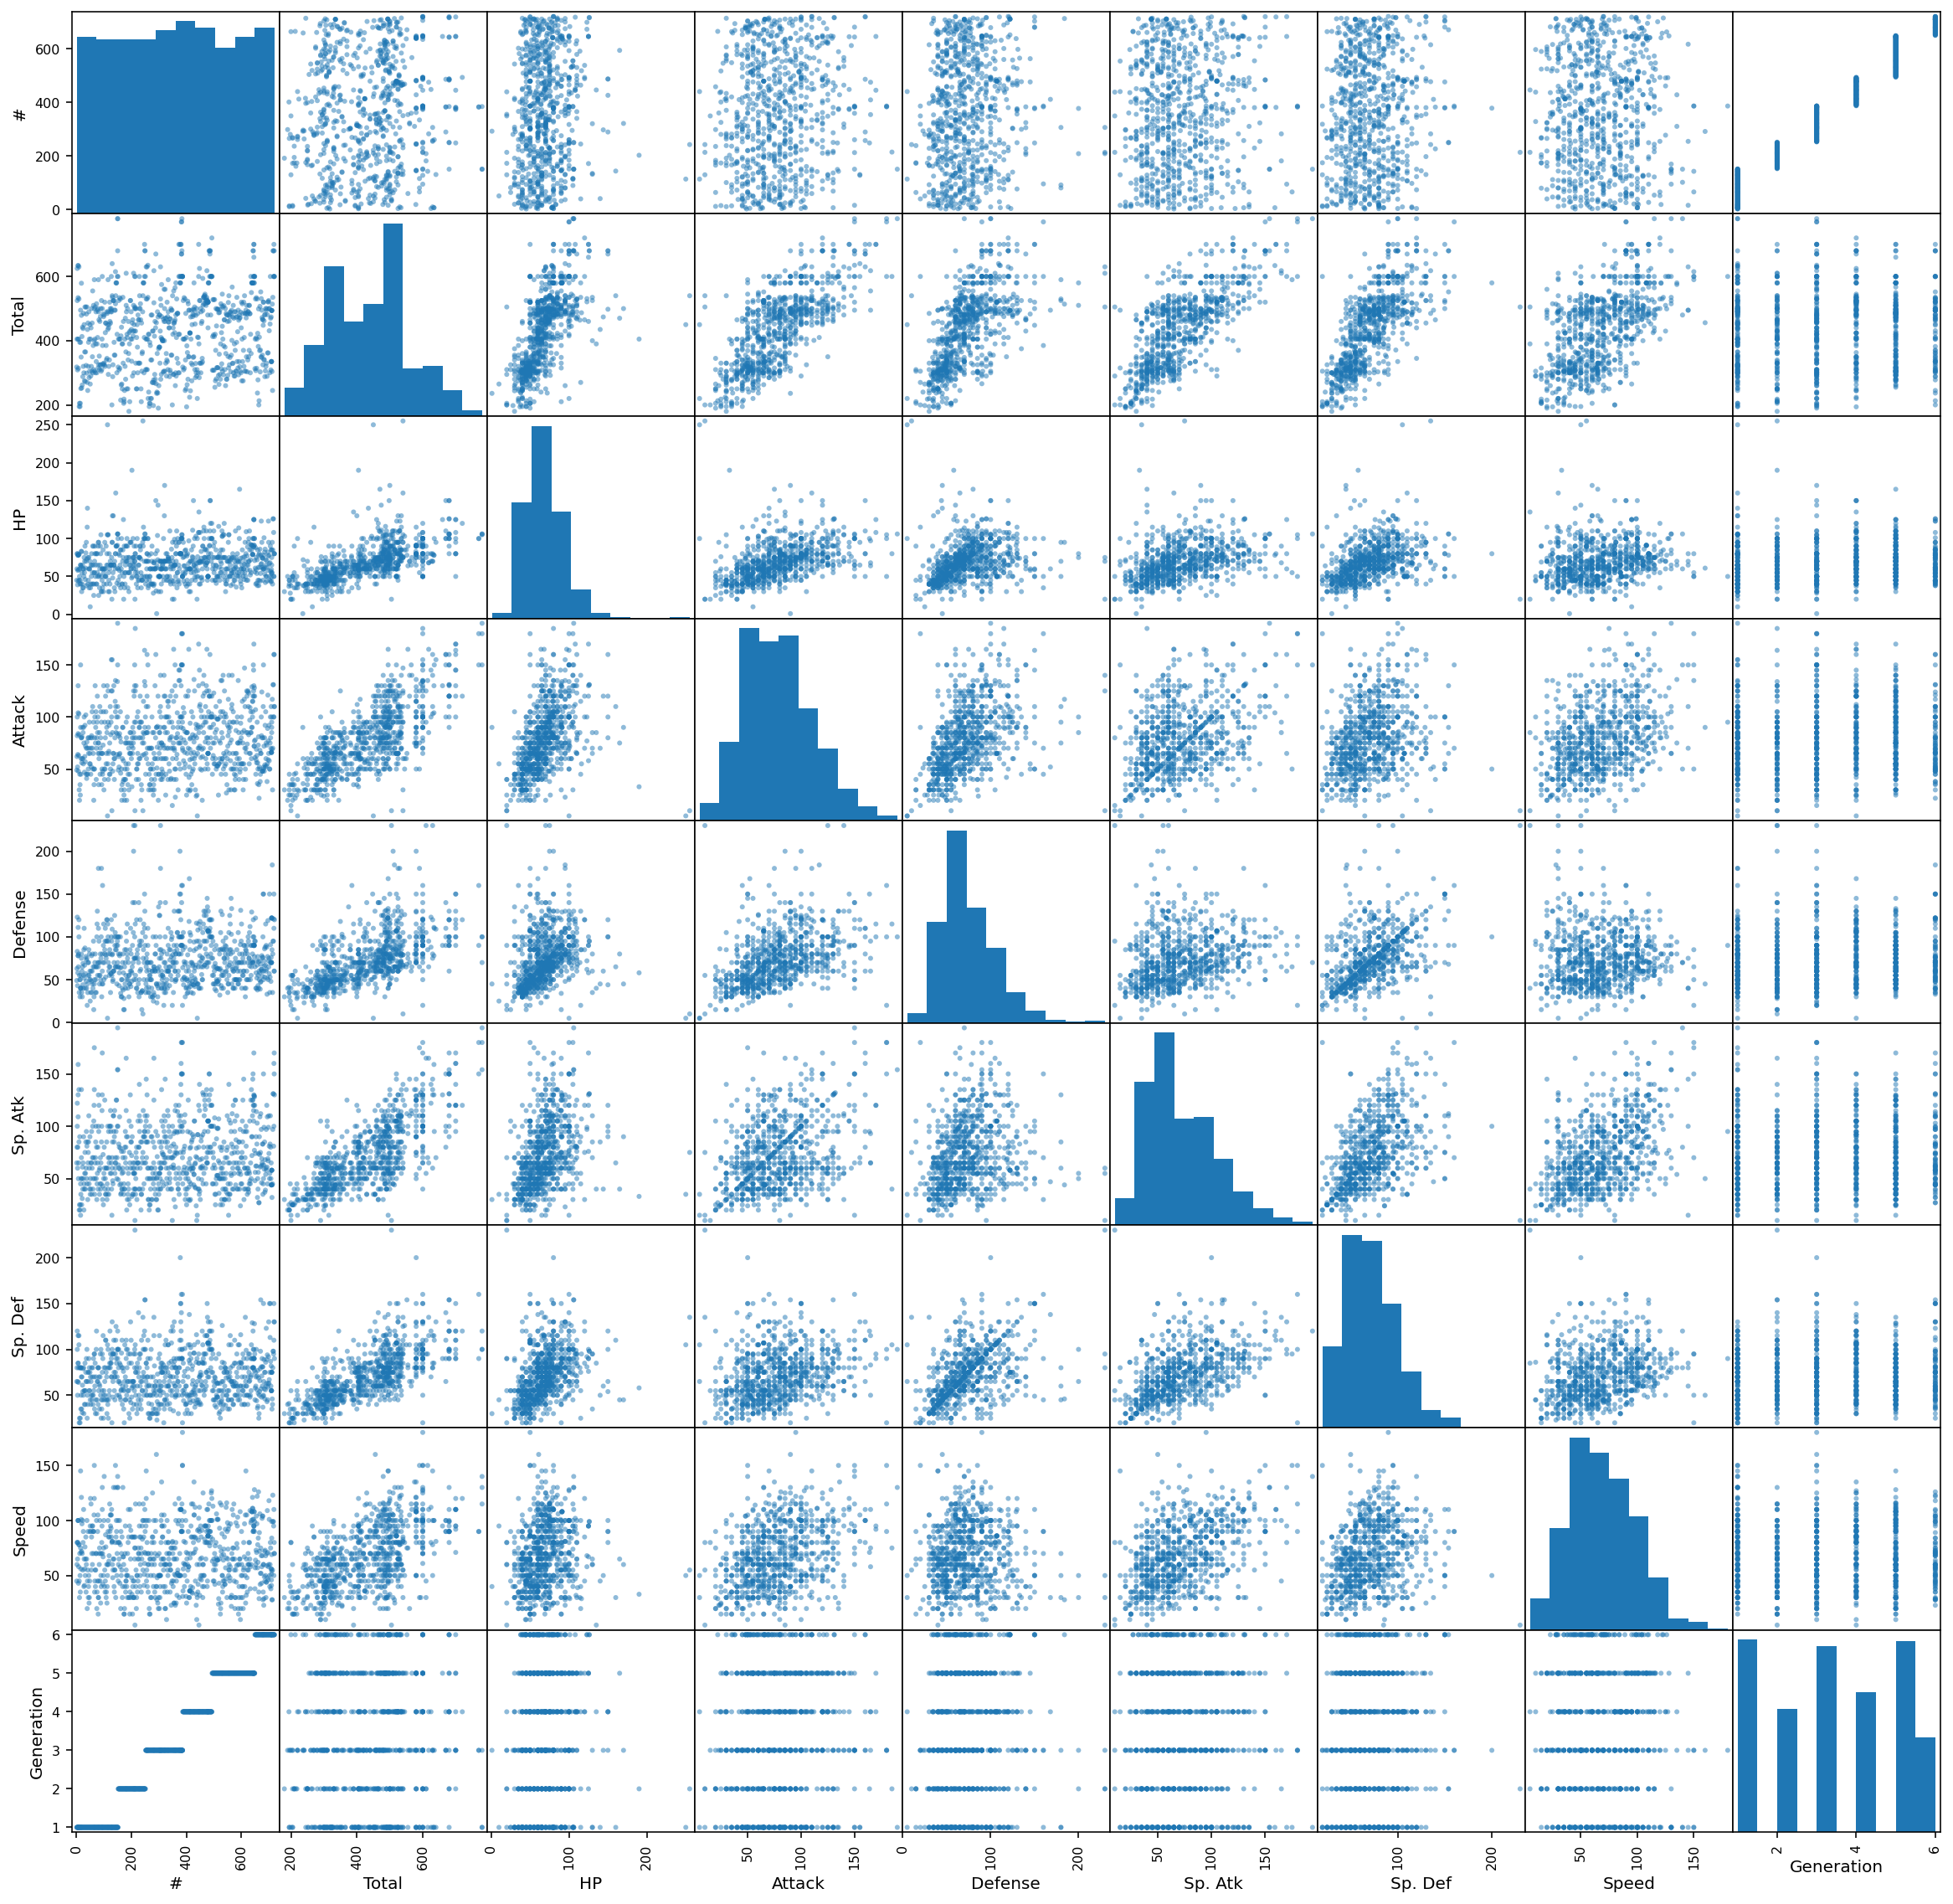

In [5]:
# generate scatter matrix to compare quantitative data
pd.plotting.scatter_matrix(pokemon.drop(['Legendary'], axis=1), figsize=(20, 20));

In [37]:
# filter data to only include fire, water, and grass types
in_fire_water = (pokemon['Type 1'] == 'Water') | (pokemon['Type 1'] == 'Fire')
pokemon = pokemon[in_fire_water].reset_index(drop=True)
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
1,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
2,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
3,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
4,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [38]:
# get filtered data shape
pokemon.shape

(164, 13)

In [39]:
# filter Pokemon data to include quantitative columns for PCA
pokemon_features = pokemon[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
pokemon_features = np.array(pokemon_features)
pokemon_features

array([[ 39,  52,  43,  60,  50,  65],
       [ 58,  64,  58,  80,  65,  80],
       [ 78,  84,  78, 109,  85, 100],
       [ 78, 130, 111, 130,  85, 100],
       [ 78, 104,  78, 159, 115, 100],
       [ 44,  48,  65,  50,  64,  43],
       [ 59,  63,  80,  65,  80,  58],
       [ 79,  83, 100,  85, 105,  78],
       [ 79, 103, 120, 135, 115,  78],
       [ 38,  41,  40,  50,  65,  65],
       [ 73,  76,  75,  81, 100, 100],
       [ 50,  52,  48,  65,  50,  55],
       [ 80,  82,  78,  95,  80,  85],
       [ 55,  70,  45,  70,  50,  60],
       [ 90, 110,  80, 100,  80,  95],
       [ 40,  50,  40,  40,  40,  90],
       [ 65,  65,  65,  50,  50,  90],
       [ 90,  95,  95,  70,  90,  70],
       [ 40,  40,  35,  50, 100,  70],
       [ 80,  70,  65,  80, 120, 100],
       [ 50,  85,  55,  65,  65,  90],
       [ 65, 100,  70,  80,  80, 105],
       [ 90,  65,  65,  40,  40,  15],
       [ 95,  75, 110, 100,  80,  30],
       [ 95,  75, 180, 130,  80,  30],
       [ 65,  45,  55,  4

In [40]:
# run PCA on the data
pca = PCA(n_components=2)
pca_output = pca.fit_transform(pokemon_features)

In [41]:
# format PCA output
pca_output = pd.DataFrame(pca_output)
pca_output.columns = ['pc_1', 'pc_2']
pca_output['type'] = pokemon['Type 1']
pca_output.head()

,pc_1,pc_2,type
0,-53.960050,-12.162985,Fire
1,-15.766159,-16.227986,Fire
2,36.435771,-22.721342,Fire
3,81.488787,-10.807263,Fire
4,86.040930,-28.463241,Fire


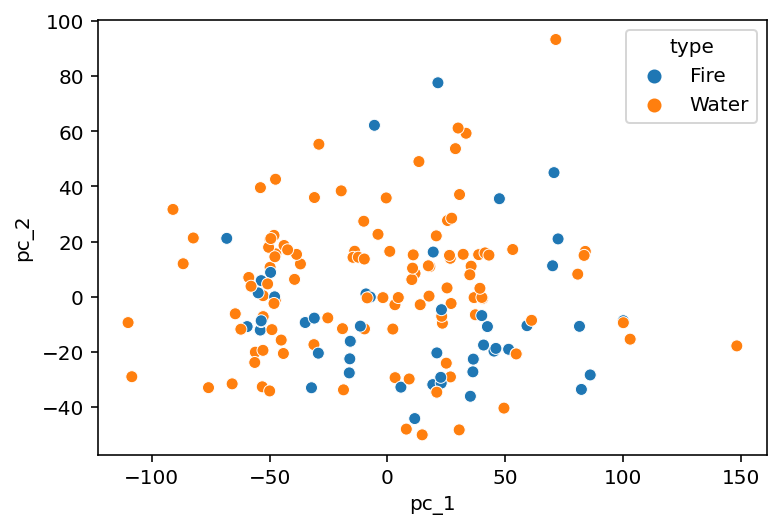

In [42]:
# plot PCA output 
sns.scatterplot(x='pc_1', y='pc_2', data=pca_output, hue='type');

### Feature Engineering

The clustering does not look very good! In my personal experience playing the games, higher HP generally would indicate a grass type Pokemon, while other traits, like special attack, would indicate a water type and physical attack would indicate a fire type. I believe the reason for this is the correlations that exist between all of the quantiative traits. Since the data is raw data, stronger Pokemon (like final evolutions) will have stronger attributes in all categories. This can be corrected by including ratios of features, rather than the raw values themselves. 

In [43]:
pokemon.head(15)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
1,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
2,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
3,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
4,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
5,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
6,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
7,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False
8,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False
9,37,Vulpix,Fire,NaN,299,38,41,40,50,65,65,1,False


In [72]:
# add engineered features to dataset
pokemon['HP/Atk'] = pokemon['HP'] / pokemon['Attack']
# pokemon['HP/Def'] = pokemon['HP'] / pokemon['Defense']
pokemon['Atk/Sp. Atk'] = pokemon['Attack'] / pokemon['Sp. Atk']
pokemon['Def/Sp. Def'] = pokemon['Defense'] / pokemon['Sp. Def']
pokemon['HP/Spd'] = pokemon['HP'] / pokemon['Speed']
pokemon['Atk/Def'] = pokemon['Attack'] / pokemon['Defense']
pokemon['Sp. Atk/Sp. Def'] = pokemon['Sp. Atk'] / pokemon['Sp. Def']
pokemon['HP/Total'] = pokemon['HP'] / pokemon['Total']
pokemon.head(20)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,HP/Atk,Atk/Sp. Atk,Def/Sp. Def,HP/Spd,Atk/Def,Sp. Atk/Sp. Def,HP/Total
0,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,0.750000,0.866667,0.860000,0.600000,1.209302,1.200000,0.126214
1,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,0.906250,0.800000,0.892308,0.725000,1.103448,1.230769,0.143210
2,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,0.928571,0.770642,0.917647,0.780000,1.076923,1.282353,0.146067
3,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False,0.600000,1.000000,1.305882,0.780000,1.171171,1.529412,0.123028
4,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False,0.750000,0.654088,0.678261,0.780000,1.333333,1.382609,0.123028
5,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False,0.916667,0.960000,1.015625,1.023256,0.738462,0.781250,0.140127
6,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False,0.936508,0.969231,1.000000,1.017241,0.787500,0.812500,0.145679
7,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False,0.951807,0.976471,0.952381,1.012821,0.830000,0.809524,0.149057
8,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False,0.766990,0.762963,1.043478,1.012821,0.858333,1.173913,0.125397
9,37,Vulpix,Fire,NaN,299,38,41,40,50,65,65,1,False,0.926829,0.820000,0.615385,0.584615,1.025000,0.769231,0.127090


In [87]:
# filter dataset to include engineered features
pokemon_features = pokemon[['Atk/Def', 'Sp. Atk/Sp. Def', 'Atk/Sp. Atk', 'HP/Atk']]
pokemon_features = np.array(pokemon_features)
pokemon_features

array([[1.20930233, 1.2       , 0.86666667, 0.75      ],
       [1.10344828, 1.23076923, 0.8       , 0.90625   ],
       [1.07692308, 1.28235294, 0.7706422 , 0.92857143],
       [1.17117117, 1.52941176, 1.        , 0.6       ],
       [1.33333333, 1.3826087 , 0.65408805, 0.75      ],
       [0.73846154, 0.78125   , 0.96      , 0.91666667],
       [0.7875    , 0.8125    , 0.96923077, 0.93650794],
       [0.83      , 0.80952381, 0.97647059, 0.95180723],
       [0.85833333, 1.17391304, 0.76296296, 0.76699029],
       [1.025     , 0.76923077, 0.82      , 0.92682927],
       [1.01333333, 0.81      , 0.9382716 , 0.96052632],
       [1.08333333, 1.3       , 0.8       , 0.96153846],
       [1.05128205, 1.1875    , 0.86315789, 0.97560976],
       [1.55555556, 1.4       , 1.        , 0.78571429],
       [1.375     , 1.25      , 1.1       , 0.81818182],
       [1.25      , 1.        , 1.25      , 0.8       ],
       [1.        , 1.        , 1.3       , 1.        ],
       [1.        , 0.77777778,

In [88]:
# run PCA on engineered features
pca = PCA(n_components=2)
pca_output = pca.fit_transform(pokemon_features)

In [89]:
# format PCA output
pca_output = pd.DataFrame(pca_output)
pca_output.columns = ['pc_1', 'pc_2']
pca_output['type'] = pokemon['Type 1']
pca_output.head()

,pc_1,pc_2,type
0,-0.056248,0.235046,Fire
1,-0.214623,0.175364,Fire
2,-0.257380,0.200490,Fire
3,0.096797,0.420136,Fire
4,-0.166911,0.510708,Fire


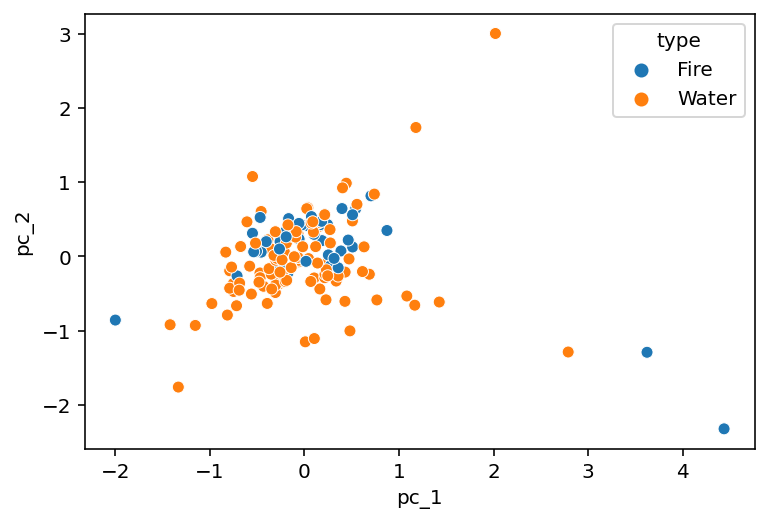

In [90]:
# plot PCA output 
sns.scatterplot(x='pc_1', y='pc_2', data=pca_output, hue='type');